# Data

In [1]:
import tensorflow as tf
import keras
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda
import keras.backend as K
from keras.utils import plot_model
from keras.models import Model
import random

# import mnist dataset
from tensorflow.keras.datasets import mnist

tf.random.set_seed(seed=0)
random.seed(0)
np.random.seed(0)
keras.utils.set_random_seed(0)

from resnet import ResNet18
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')


# set the colormap.
plt.rc("image",cmap="gray")

(28, 28)

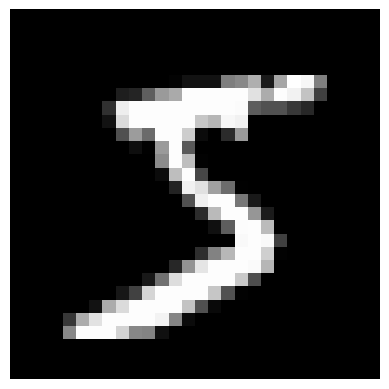

In [2]:
# example image
plt.imshow(tf.squeeze(X_train[0]))
plt.axis("off")

# get the input shape
data_input_shape = X_train[0].shape
data_input_shape

### RESNET-18

In [3]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2,shuffle = True)
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

In [4]:
earlystop = keras.callbacks.EarlyStopping(
    min_delta=0.01,
    restore_best_weights=True,
    patience=3,
)

In [5]:
resnet_18 = ResNet18()
resnet_18(tf.zeros([1, 28,28,1]), training = True)
resnet_18.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
resnet_18.summary()

Model: "res_net18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_conv2d (MyConv2D)            │ ?                      │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block (ResidualBlock)  │ ?                      │        74,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_1                │ ?                      │        74,368 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_2                │ ?                      │       231,296 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_3                │ ?                      │       296,192 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_4                │ ?                      │       921,344 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_5                │ ?                      │     1,182,208 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_6                │ ?                      │     3,677,696 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_7                │ ?                      │     4,723,712 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,189,770 (42.69 MB)

 Trainable params: 11,180,170 (42.65 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_train.shape


(48000, 28, 28, 1)

In [7]:
x_train.shape

(48000, 28, 28, 1)

In [8]:
y_train_encoded.shape

(48000, 10)

In [9]:
history = resnet_18.fit(x_train, y_train_encoded, batch_size=1024,epochs=5, validation_data=(x_val, y_val_encoded), callbacks=[earlystop])

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 797ms/step - accuracy: 0.8268 - loss: 0.6980 - val_accuracy: 0.4947 - val_loss: 8.1064
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 779ms/step - accuracy: 0.9848 - loss: 0.0521 - val_accuracy: 0.7231 - val_loss: 1.3329
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 766ms/step - accuracy: 0.9892 - loss: 0.0332 - val_accuracy: 0.9494 - val_loss: 0.1698
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 747ms/step - accuracy: 0.9922 - loss: 0.0245 - val_accuracy: 0.9741 - val_loss: 0.0988
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 745ms/step - accuracy: 0.9918 - loss: 0.0237 - val_accuracy: 0.9790 - val_loss: 0.0818


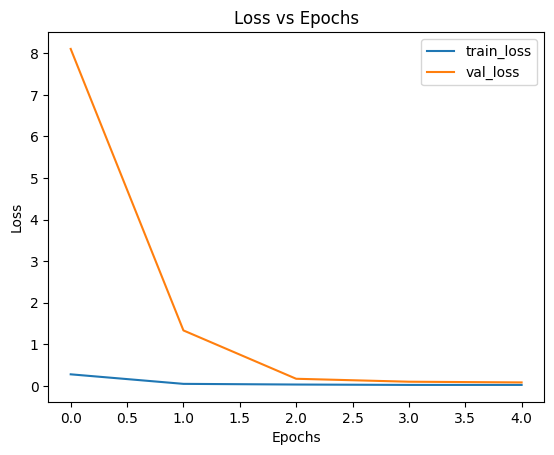

In [10]:
# plot the training history
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [11]:
# test the model
x_test = X_test.reshape(-1, 28, 28, 1)
y_test_encoded = to_categorical(Y_test)
y_pred = resnet_18.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


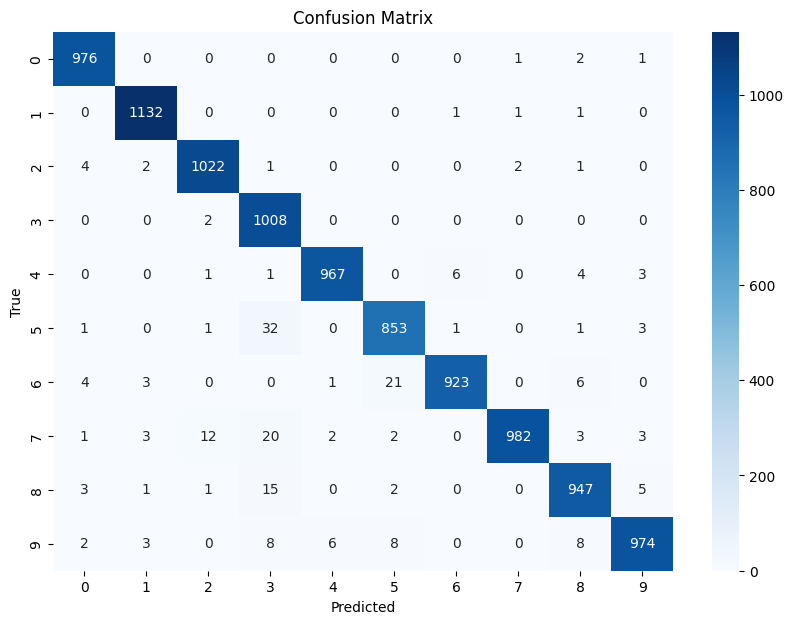

In [12]:

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

y_pred = resnet_18.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = Y_test.astype("int")
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=range(10), columns=range(10))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [13]:
# print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9784


# FSL

In [58]:
def triplet_loss(margin=1.0):
    """
    A function that returns the triplet loss function.
    """
    def _triplet_loss(_, y_pred):
        # get the anchor, positive and negative embeddings
        anchor, positive, negative = y_pred[:,0], y_pred[:,1], y_pred[:,2]
        # calculate the distance between the anchor and the positive
        positive_distance = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
        negative_distance = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
        
        # calculate triplet loss
        loss = tf.maximum(positive_distance - negative_distance + margin, 0.0)

        return tf.reduce_mean(loss)
    return _triplet_loss

def get_triplets(x, y, n_classes, n_samples):
    triplets = []
    # create an array of labels
    labels = np.arange(n_classes)
    for label in labels:
        # get the indices of images belongs the current class
        class_indices = np.where(y == label)[0]
        #np.random.shuffle(class_indices)

        # get the indices of images belongs to other classes
        other_indices = np.where(y != label)[0]

        for i in range(n_samples):
            # Select an anchor from the current class
            anchor_index = class_indices[i% len(class_indices)]

            # Select a positive sample from the current class
            positive_index = class_indices[(i+1) % len(class_indices)]

            # Select a negative sample from the other classes
            negative_index = np.random.choice(other_indices)

            # Append the triplet to the triplets list
            triplets.append([x[anchor_index], x[positive_index], x[negative_index]])

    #random.shuffle(triplets)
    return np.array(triplets)

# get the support set
def get_random_support(model,x, y ,n ,k):
    """
    A function that creates random support set for each class. It returns the normalized mean feature of the support set.
    """
    support_set = []
    for i in range(n):
        # get the indices of images belongs the current class
        class_indices = np.where(y == i)[0]

        # select k random samples from the current class
        support_indices = np.random.choice(class_indices, k, replace=False)
        
        # append the support set
        feature = model.predict([x[support_indices], x[support_indices], x[support_indices]])[0]
        
        mean_feature = tf.reduce_mean(feature, axis=0)
        mean_feature = mean_feature / tf.norm(mean_feature)
        
        support_set.append(mean_feature)
        
    return np.array(support_set)

def distance(x, y):
    return np.sqrt(np.sum(np.square(x - y), axis=-1))

def make_prediction(support_set, query):
    """
    A function that makes predictions based on the distance between support sets and query.
    
    """
    predictions = []
    for feature in query:
        # Normalize the query feature
        #normalized_feature = feature / tf.norm(feature)
        # Calculate the Euclidean distance to each support set vector
        distances = np.linalg.norm(support_set - feature, axis=1)
        # Find the support set vector with the minimum distance
        prediction = np.argmin(distances)
        predictions.append(prediction)

    return np.array(predictions)


In [59]:
from resnet_fsl_efe import ResNet18_fsl

base_model = ResNet18_fsl()

input_shape = (28, 28, 1)

# define inputs for triplet loss function

anchor_input = Input(input_shape, name="anchor_input")
positive_input = Input(input_shape, name="positive_input")
negative_input = Input(input_shape, name="negative_input")


# Process each input through the same base network (ResNet18)

encoded_anchor = base_model(anchor_input)
encoded_positive = base_model(positive_input)
encoded_negative = base_model(negative_input)

out = Lambda(lambda x: tf.stack(x, axis=1),output_shape=(3,512))([encoded_anchor, encoded_positive, encoded_negative])

# define the triplet network

triplet_network = Model(inputs=[anchor_input, positive_input, negative_input], outputs=out)

triplet_network.compile(optimizer="adam", loss=triplet_loss())

triplet_network.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ anchor_input        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positive_input      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ negative_input      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_net18_fsl_5     │ (None, 512)       │ 11,184,640 │ anchor_input[0][… │
│ (ResNet18_fsl)      │                   │            │ positive_input[0… │
│                     │                   │            │ negative_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_5 (Lambda)   │ (None, 3, 512)    │          0 │ res_net18_fsl_5[… │
│                     │                   │            │ res_net18_fsl_5[… │
│                     │                   │            │ res_net18_fsl_5[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,184,640 (42.67 MB)

 Trainable params: 11,175,040 (42.63 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [60]:
n_classes = 10
n_samples = 100 # number of samples per class

# get the triplets
triplet_pairs = get_triplets(x_train, x_train, n_classes, n_samples)
y_dummy = np.zeros((len(triplet_pairs)))

anchors = triplet_pairs[:, 0]
positives = triplet_pairs[:, 1]
negatives = triplet_pairs[:, 2]

# train the triplet network
triplet_network.fit([anchors, positives, negatives], y_dummy, batch_size=128, epochs=7)

Epoch 1/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 461ms/step - loss: 56.5898
Epoch 2/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 460ms/step - loss: 4.8058
Epoch 3/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 456ms/step - loss: 1.6926
Epoch 4/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 449ms/step - loss: 0.0250 
Epoch 5/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 453ms/step - loss: 0.0000e+00
Epoch 6/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - loss: 0.0000e+00
Epoch 7/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step - loss: 0.0000e+00


In [61]:
n = 10 
k = 5 # support vector size

support_set = get_random_support(triplet_network,x_train, y_train, n, k)
print(support_set.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
(10, 512)


In [62]:
# query image
query_image = x_test[0:500]


# get the feature of the query image

feature = triplet_network.predict([query_image, query_image,query_image])
anchor_features = feature[:,0,:]

normalized_features = anchor_features / np.linalg.norm(anchor_features, axis=1, keepdims=True)
normalized_features.shape


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


(500, 512)

In [63]:
support_set.shape

(10, 512)

In [64]:

predictions = make_prediction(support_set, normalized_features)
predictions

array([8, 2, 6, 8, 9, 1, 7, 5, 9, 8, 9, 9, 8, 9, 1, 7, 9, 7, 8, 4, 8, 0,
       4, 5, 4, 8, 5, 9, 9, 1, 8, 1, 8, 9, 8, 3, 7, 1, 2, 1, 1, 5, 9, 6,
       4, 5, 7, 6, 7, 9, 9, 8, 5, 7, 9, 0, 7, 6, 8, 6, 7, 8, 4, 2, 8, 4,
       9, 9, 8, 8, 7, 8, 2, 8, 1, 7, 9, 7, 4, 8, 5, 9, 2, 7, 8, 7, 8, 7,
       9, 6, 8, 6, 6, 8, 1, 8, 4, 8, 0, 8, 4, 8, 5, 7, 7, 8, 2, 6, 7, 9,
       9, 8, 6, 8, 8, 4, 4, 7, 9, 8, 7, 9, 7, 9, 7, 9, 3, 8, 8, 5, 8, 8,
       5, 8, 8, 1, 0, 6, 4, 9, 6, 5, 7, 6, 8, 1, 8, 9, 0, 8, 8, 8, 8, 5,
       1, 8, 4, 0, 7, 9, 4, 9, 5, 9, 4, 7, 9, 4, 1, 9, 7, 8, 2, 8, 2, 1,
       1, 9, 1, 8, 1, 9, 9, 3, 9, 9, 8, 8, 8, 1, 1, 4, 8, 7, 9, 5, 1, 9,
       9, 8, 8, 9, 4, 1, 6, 4, 8, 8, 2, 7, 7, 8, 7, 4, 8, 9, 8, 9, 4, 5,
       7, 9, 8, 8, 6, 3, 7, 4, 6, 5, 8, 2, 9, 8, 8, 7, 2, 2, 9, 1, 5, 8,
       8, 7, 2, 7, 8, 6, 9, 2, 8, 6, 8, 5, 7, 8, 2, 9, 2, 9, 8, 8, 5, 8,
       8, 1, 8, 1, 9, 8, 7, 9, 1, 8, 7, 9, 6, 8, 9, 1, 2, 8, 8, 5, 8, 2,
       9, 7, 6, 5, 7, 2, 8, 6, 0, 7, 8, 7, 9, 2, 6,

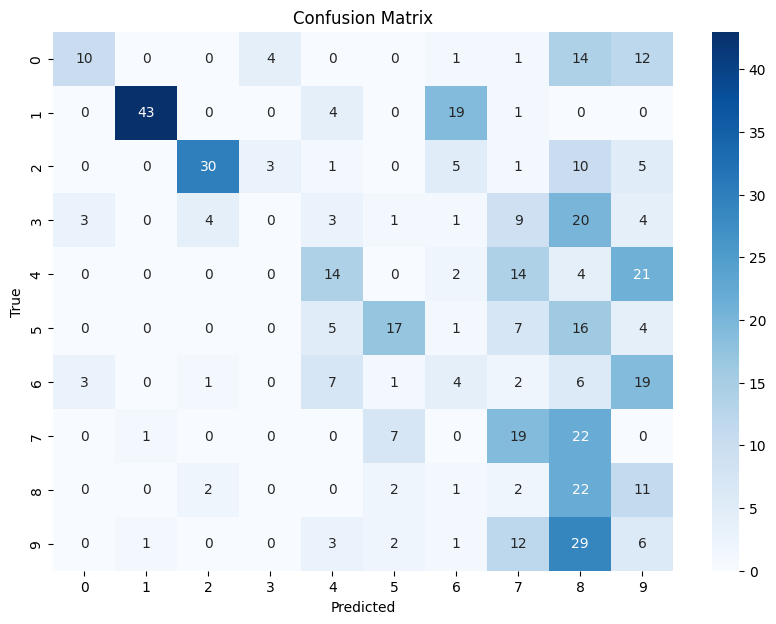

In [65]:
# create a confusion matrix
cm = confusion_matrix(y_test[:500], predictions)
cm = pd.DataFrame(cm, index=range(10), columns=range(10))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [66]:
# print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test[:500], predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.33
